In [1]:
library(tidyverse)
library(dplyr)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────

In [2]:
color_dict = c("genot"= "#317d01",
    "CellFlow"= "#59d1d6",
    "chemCPA"= "#e6b1fc",
    "CPA"= "#6c0399",
    "Baseline"="#8f97a8",
    "Additive"="#ffA500")

In [3]:
# Updated R color dictionary with the new replacements
combosciplex_color_dict <- c(
  'Alvespimycin+Pirarubicin' = '#fa0e03',
  'Cediranib+PCI-34051' = '#0d3290',
  'Dacinostat+Danusertib' = '#33ff57',
  'Dacinostat+Dasatinib' = '#6300b5',
  'Dacinostat+PCI-34051' = '#88e200',
  'Givinostat+Carmofur' = '#8e3101',
  'Givinostat+Cediranib' = '#1F7530',
  'Givinostat+Crizotinib' = '#6ca05c',
  'Givinostat+Curcumin' = '#03cd4A',
  'Givinostat+Dasatinib' = '#9106eb',
  'Givinostat+SRT1720' = '#EB984E',
  'Givinostat+SRT2104' = '#260374',
  'Givinostat+Sorafenib' = '#ff5733',  
  'Givinostat+Tanespimycin' = '#a3e3af',
  'Panobinostat+Alvespimycin' = '#46adaf',
  'Panobinostat+Crizotinib' = '#8E1382',
  'Panobinostat+Curcumin' = '#bdfd0b',
  'Panobinostat+Dasatinib' = '#ce606c',
  'Panobinostat+PCI-34051' = '#795548',
  'Panobinostat+SRT1720' = '#22bb34',
  'Panobinostat+SRT2104' = '#8D6E63',
  'Panobinostat+SRT3025' = '#9d8303',
  'Panobinostat+Sorafenib' = '#d7fdfd',
  'SRT2104+Alvespimycin' = '#6ea3fa',
  'SRT3025+Cediranib' = '#f502f3',
  'control+Alvespimycin' = '#fd4c7a',
  'control+Dacinostat' = '#d6a5fa',
  'control+Dasatinib' = '#2d62a3',
  'control+Givinostat' = '#5deb2e',
  'control+Panobinostat' = '#b1cd3f',
  'control+SRT2104' = '#7788cd'
)


In [4]:
# Updated R color dictionary with the new replacements
number_terms <- c(
  'Alvespimycin+Pirarubicin' = NULL,
  'Cediranib+PCI-34051' = 5,
  'Dacinostat+Danusertib' = NULL,
  'Dacinostat+Dasatinib' = 2,
  'Dacinostat+PCI-34051' = 4,
  'Givinostat+Carmofur' = NULL,
  'Givinostat+Cediranib' = 5,
  'Givinostat+Crizotinib' = 4,
  'Givinostat+Curcumin' = 4,
  'Givinostat+Dasatinib' = 3,
  'Givinostat+SRT1720' = 3,
  'Givinostat+SRT2104' = 4,
  'Givinostat+Sorafenib' = 4,  
  'Givinostat+Tanespimycin' = NULL,
  'Panobinostat+Alvespimycin' = 3,
  'Panobinostat+Crizotinib' = 3,
  'Panobinostat+Curcumin' = 3,
  'Panobinostat+Dasatinib' = 3,
  'Panobinostat+PCI-34051' = 3,
  'Panobinostat+SRT1720' = 3,
  'Panobinostat+SRT2104' = 3,
  'Panobinostat+SRT3025' = 3,
  'Panobinostat+Sorafenib' = 3,
  'SRT2104+Alvespimycin' = 4,
  'SRT3025+Cediranib' = 5,
  'control+Alvespimycin' = 2,
  'control+Dacinostat' = 2,
  'control+Dasatinib' = 2,
  'control+Givinostat' = 2,
  'control+Panobinostat' = 2,
  'control+SRT2104' = 2
)


# Decoded

In [5]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_decoded.csv") 



New names:
• `` -> `...1`
Rows: 108 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
results_decoded <- results_decoded %>%
  filter(model %in% c("add", "otfm"))

In [7]:
results_cf = results_decoded %>%
  filter(model %in% c("otfm"))
results_add = results_decoded %>%
  filter(model %in% c("add"))

In [8]:
results_cf$diff <- results_cf$value - results_add$value
results_add$diff <- results_cf$value - results_add$value

In [9]:
results_add$err <- 1-results_add$value

In [10]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

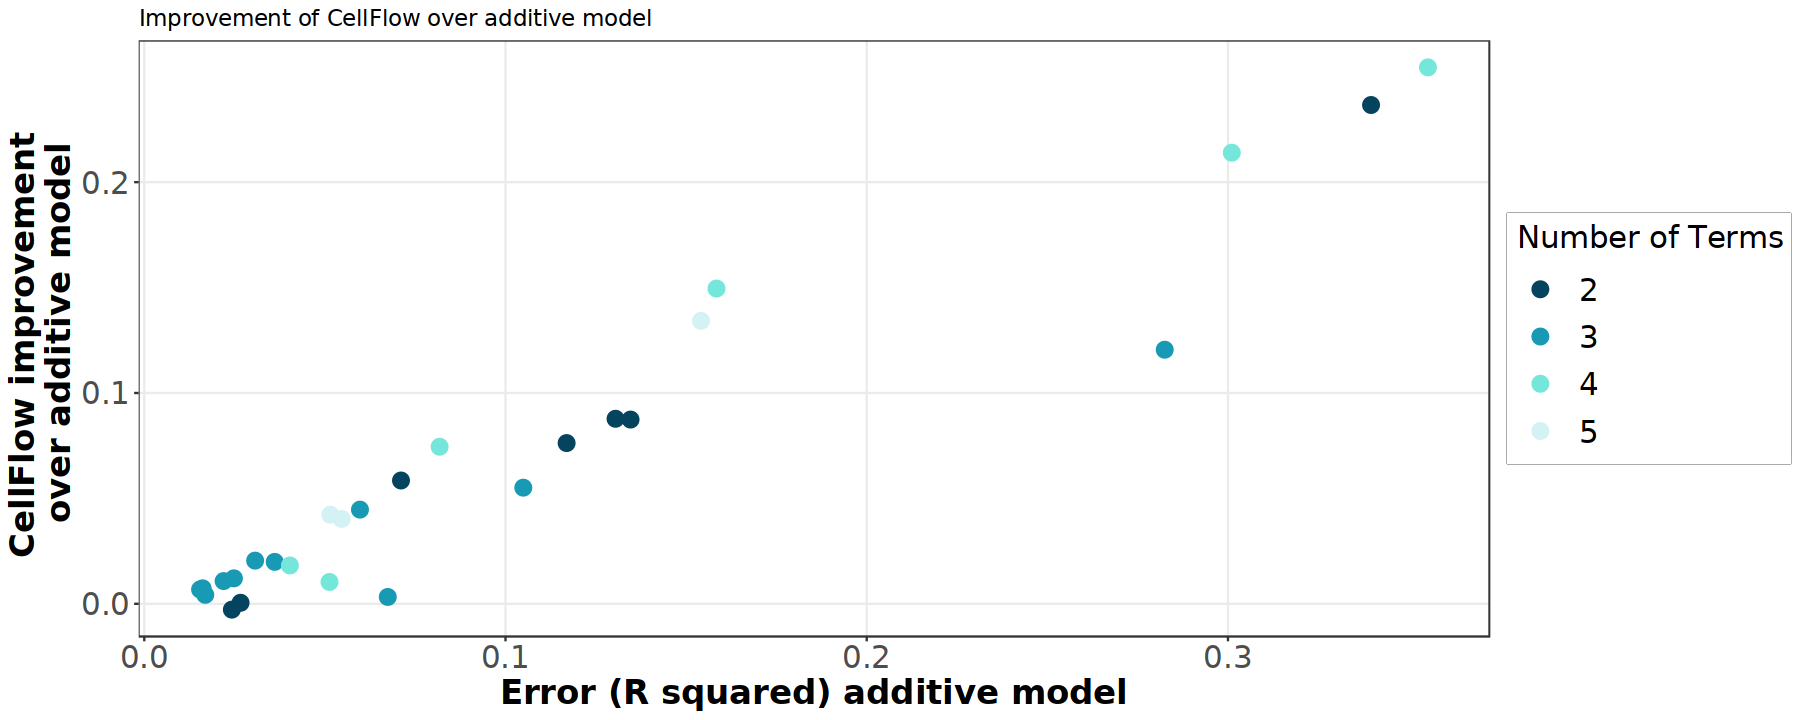

In [11]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = err, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Error (R squared) additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


# Encoded

In [12]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_encoded.csv") 



New names:
• `` -> `...1`
Rows: 432 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
results_encoded <- results_encoded %>%
  filter(model %in% c("add", "otfm"))

In [14]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

In [15]:
results_cf = results_cf %>%
  filter(metric %in% c("sinkhorn_div"))

results_add = results_add %>%
  filter(metric %in% c("sinkhorn_div"))

In [16]:
results_add$diff <- results_add$value - results_cf$value 

In [17]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

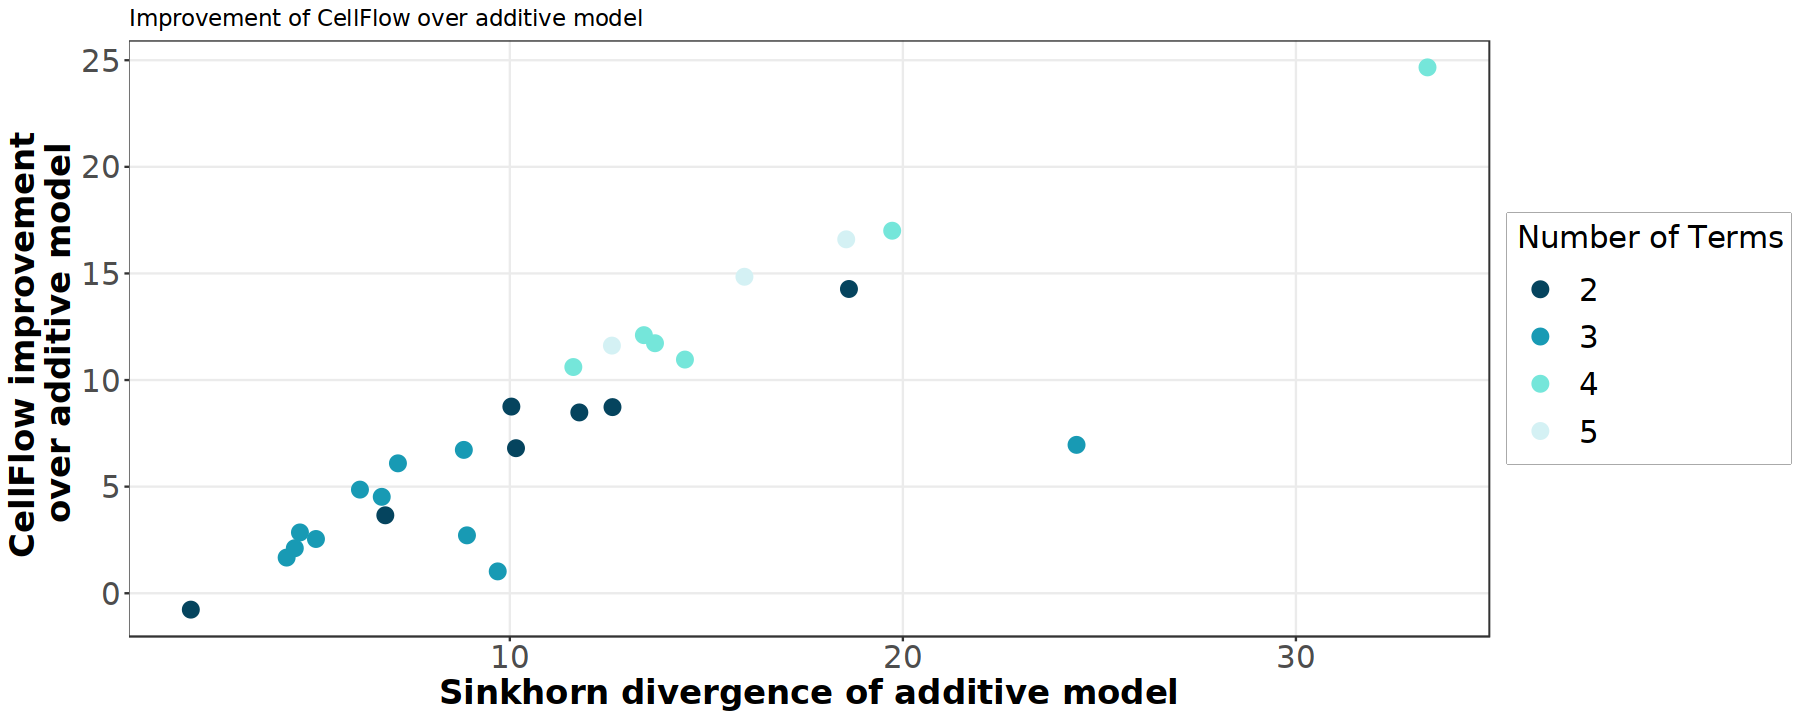

In [18]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Sinkhorn divergence of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


In [19]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

results_cf = results_cf %>%
  filter(metric %in% c("mmd"))

results_add = results_add %>%
  filter(metric %in% c("mmd"))

In [20]:
results_add$diff <- results_add$value - results_cf$value 

In [21]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

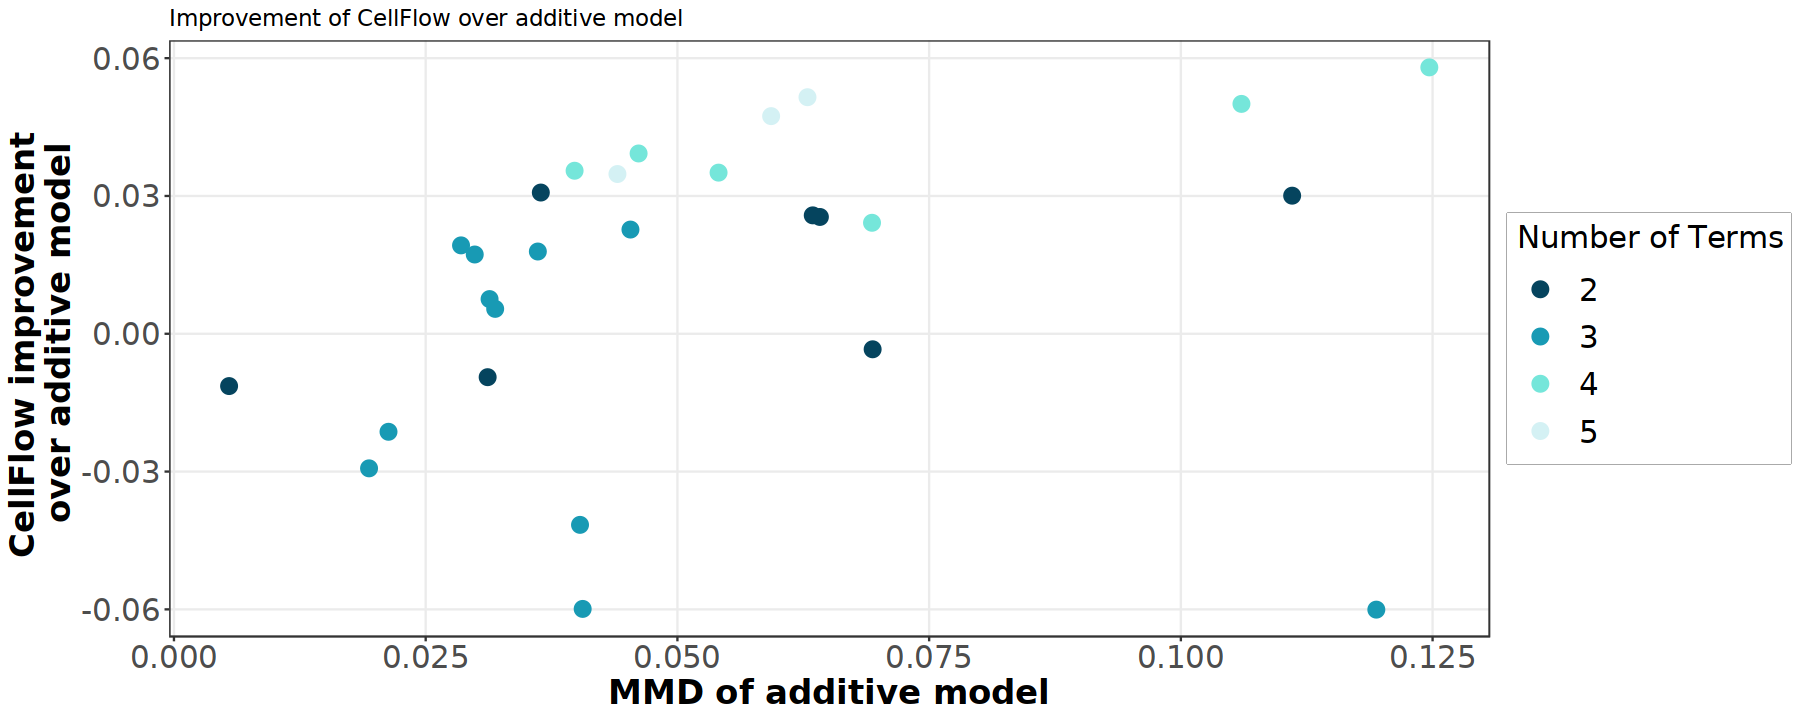

In [22]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "MMD of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


In [23]:
results_cf = results_encoded %>%
  filter(model %in% c("otfm"))
results_add = results_encoded %>%
  filter(model %in% c("add"))

results_cf = results_cf %>%
  filter(metric %in% c("e_distance"))

results_add = results_add %>%
  filter(metric %in% c("e_distance"))

In [24]:
results_add$diff <- results_add$value - results_cf$value


In [25]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

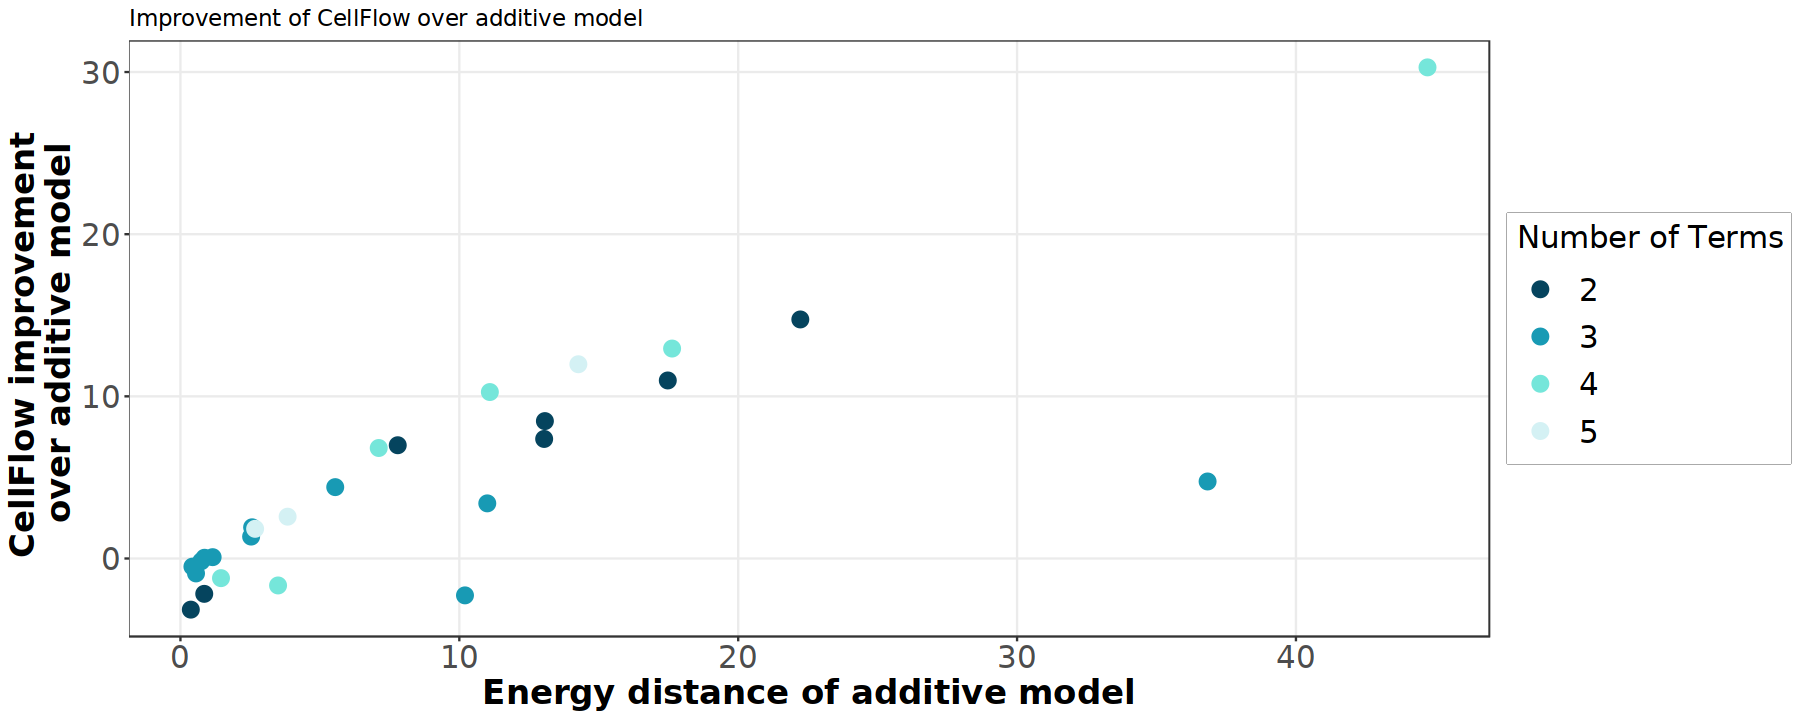

In [26]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Energy distance of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


# DEG

In [27]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/allocation/ood_metrics_deg.csv") 



New names:
• `` -> `...1`
Rows: 432 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
results_deg <- results_deg %>%
  filter(model %in% c("add", "otfm"))

In [29]:
results_cf = results_deg %>%
  filter(model %in% c("otfm"))
results_add = results_deg %>%
  filter(model %in% c("add"))

In [30]:
results_cf = results_cf %>%
  filter(metric %in% c("r_squared"))

results_add = results_add %>%
  filter(metric %in% c("r_squared"))

In [31]:
results_add$diff <- results_cf$value - results_add$value
results_add$err <- 1-results_add$value

In [32]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

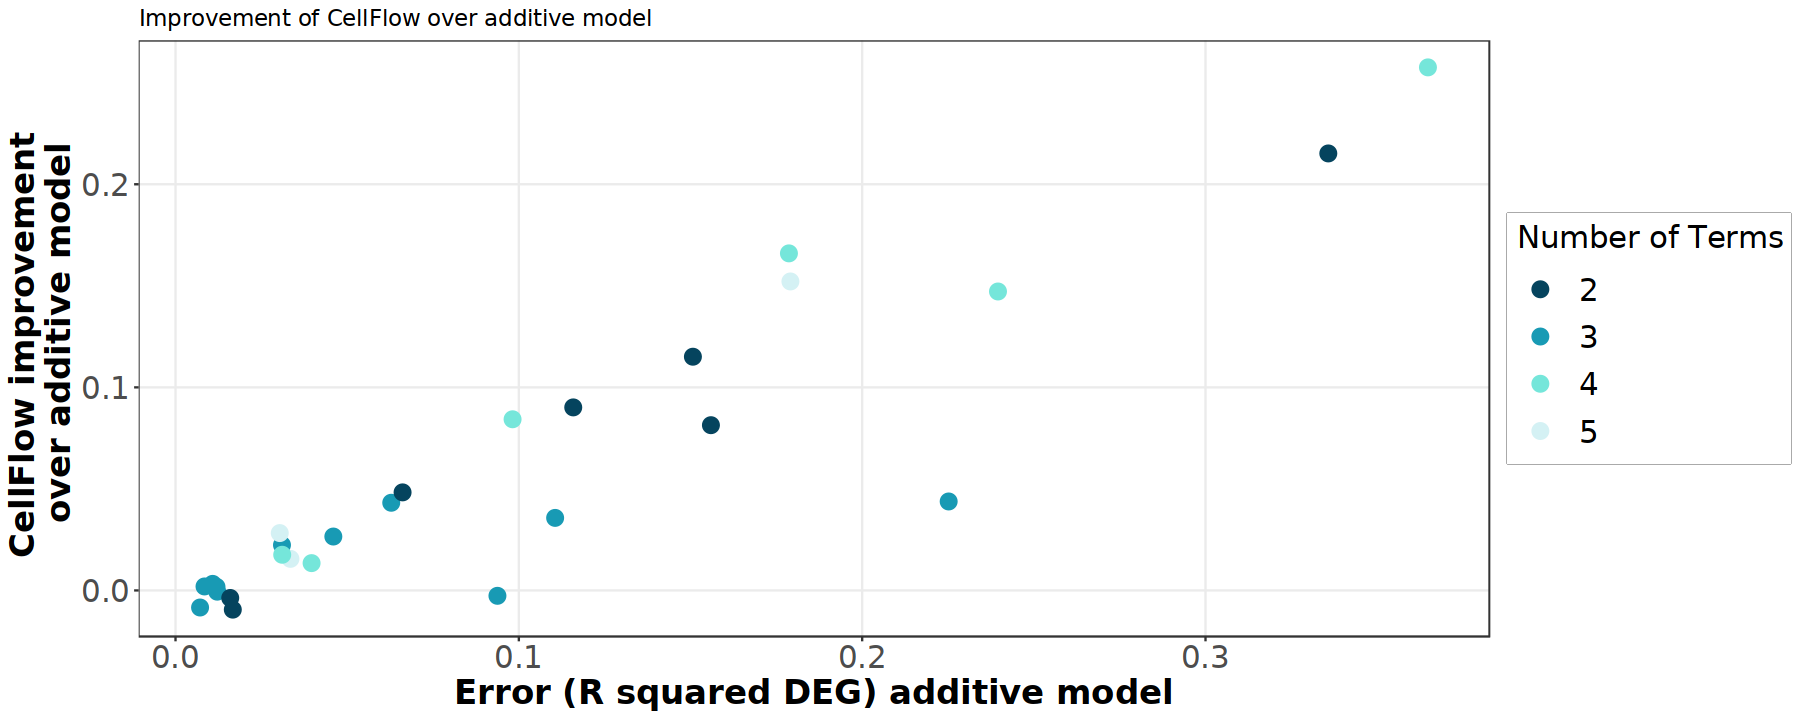

In [33]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = err, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Error (R squared DEG) additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


In [34]:
results_cf = results_deg %>%
  filter(model %in% c("otfm"))
results_add = results_deg %>%
  filter(model %in% c("add"))

In [35]:
results_cf = results_cf %>%
  filter(metric %in% c("sinkhorn_div"))

results_add = results_add %>%
  filter(metric %in% c("sinkhorn_div"))

In [36]:
results_add$diff <- results_add$value - results_cf$value


In [37]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

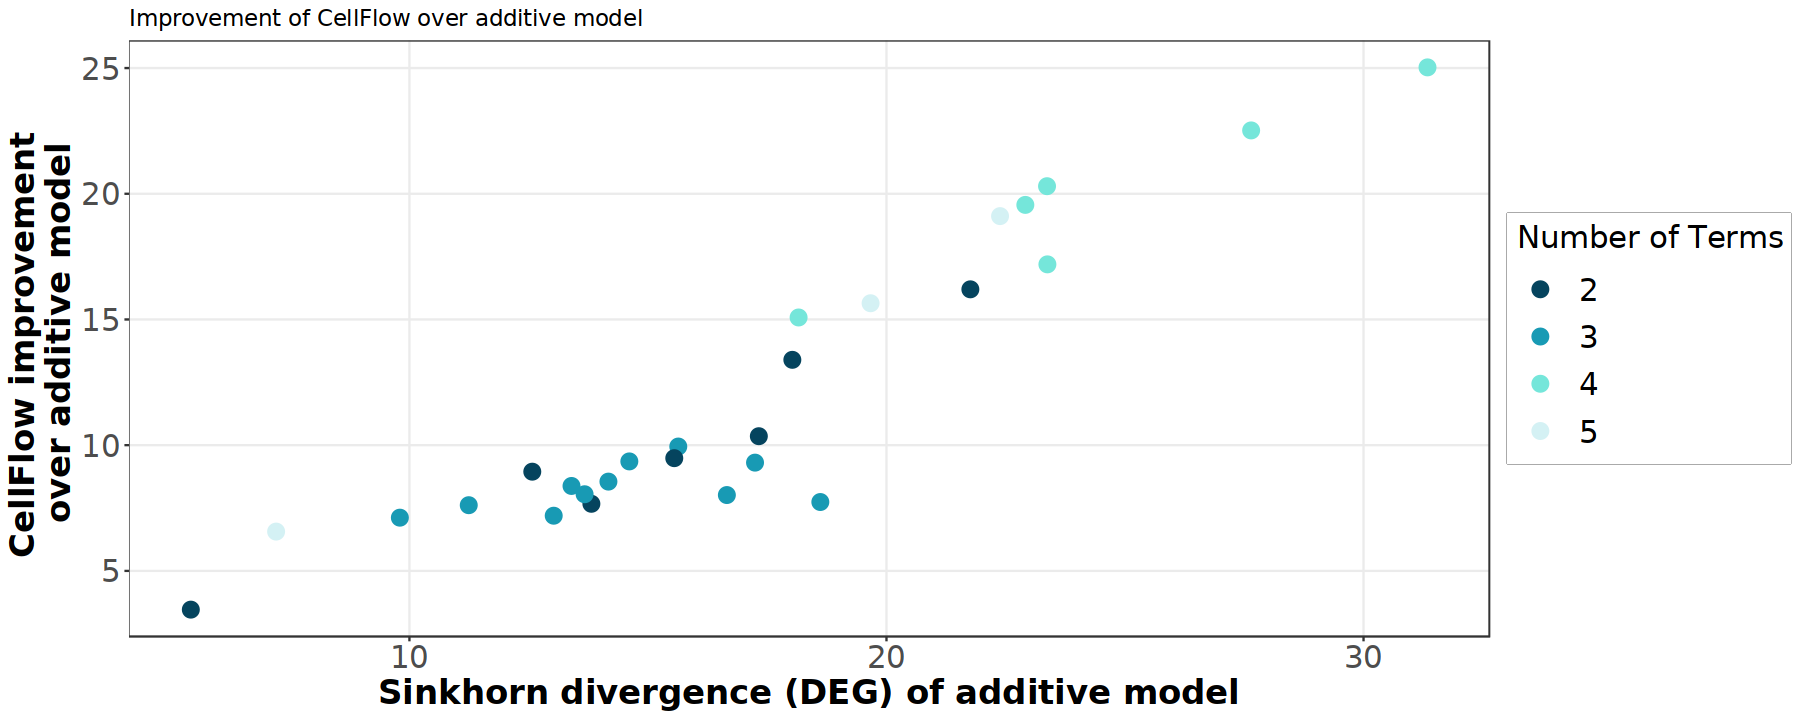

In [38]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Sinkhorn divergence (DEG) of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


In [39]:
results_cf = results_deg %>%
  filter(model %in% c("otfm"))
results_add = results_deg %>%
  filter(model %in% c("add"))

In [40]:
results_cf = results_cf %>%
  filter(metric %in% c("mmd"))

results_add = results_add %>%
  filter(metric %in% c("mmd"))

In [41]:
results_add$diff <- results_add$value - results_cf$value


In [42]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

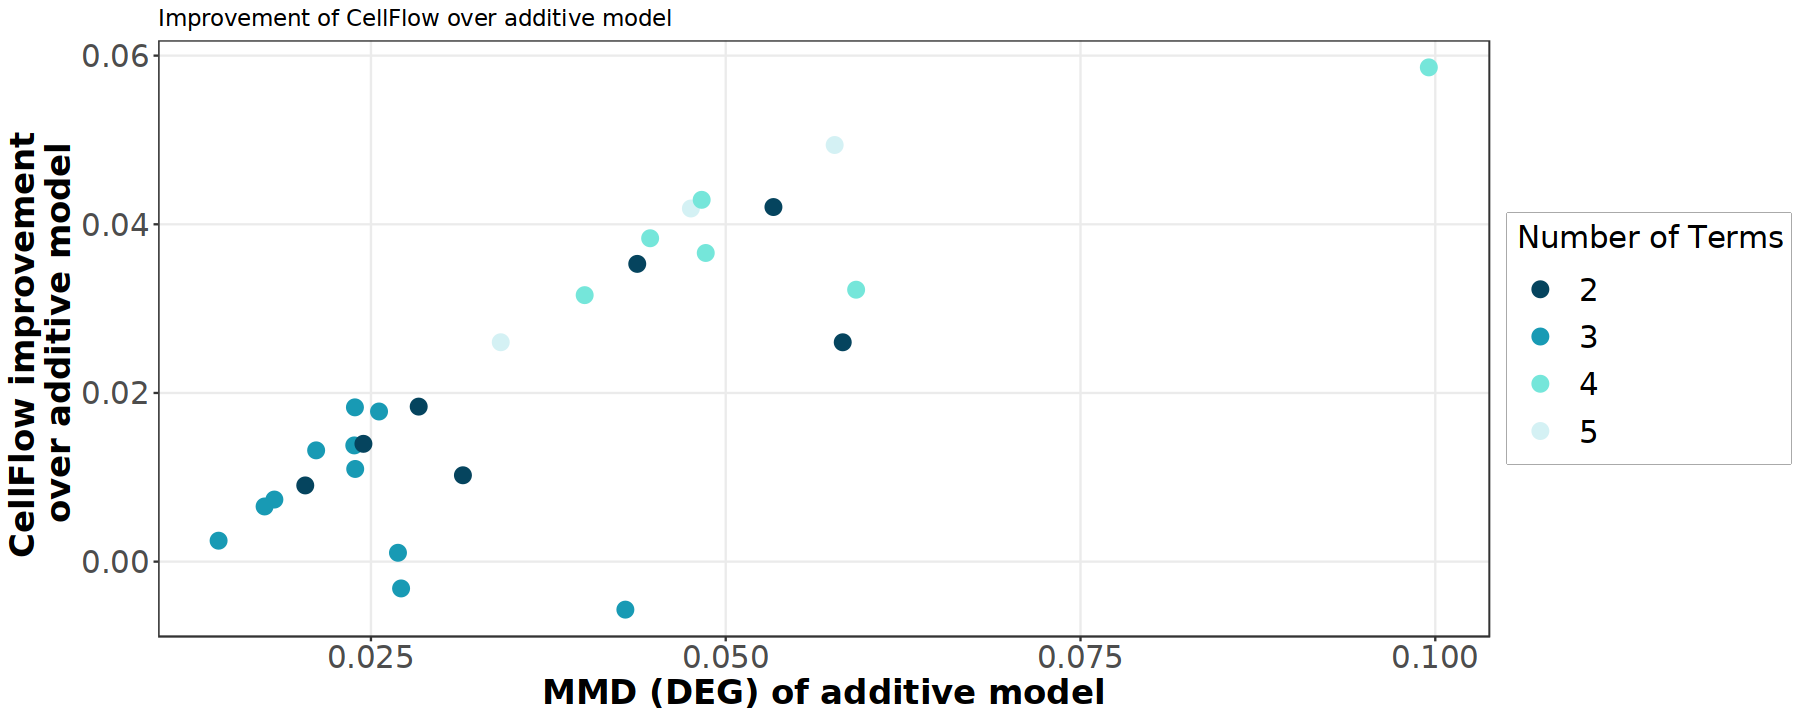

In [43]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "MMD (DEG) of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level


In [44]:
results_cf = results_deg %>%
  filter(model %in% c("otfm"))
results_add = results_deg %>%
  filter(model %in% c("add"))

In [45]:
results_cf = results_cf %>%
  filter(metric %in% c("e_distance"))

results_add = results_add %>%
  filter(metric %in% c("e_distance"))

In [46]:
results_add$diff <- results_add$value - results_cf$value


In [47]:
number_terms_vec <- unlist(number_terms)
results_add <- results_add %>%
  mutate(
    category = fct_relevel(variable, names(number_terms_vec)[order(number_terms_vec)]),  # Reorder categories
    number_terms = number_terms_vec[variable]  # Add a new column with numbers from the dictionary
  )

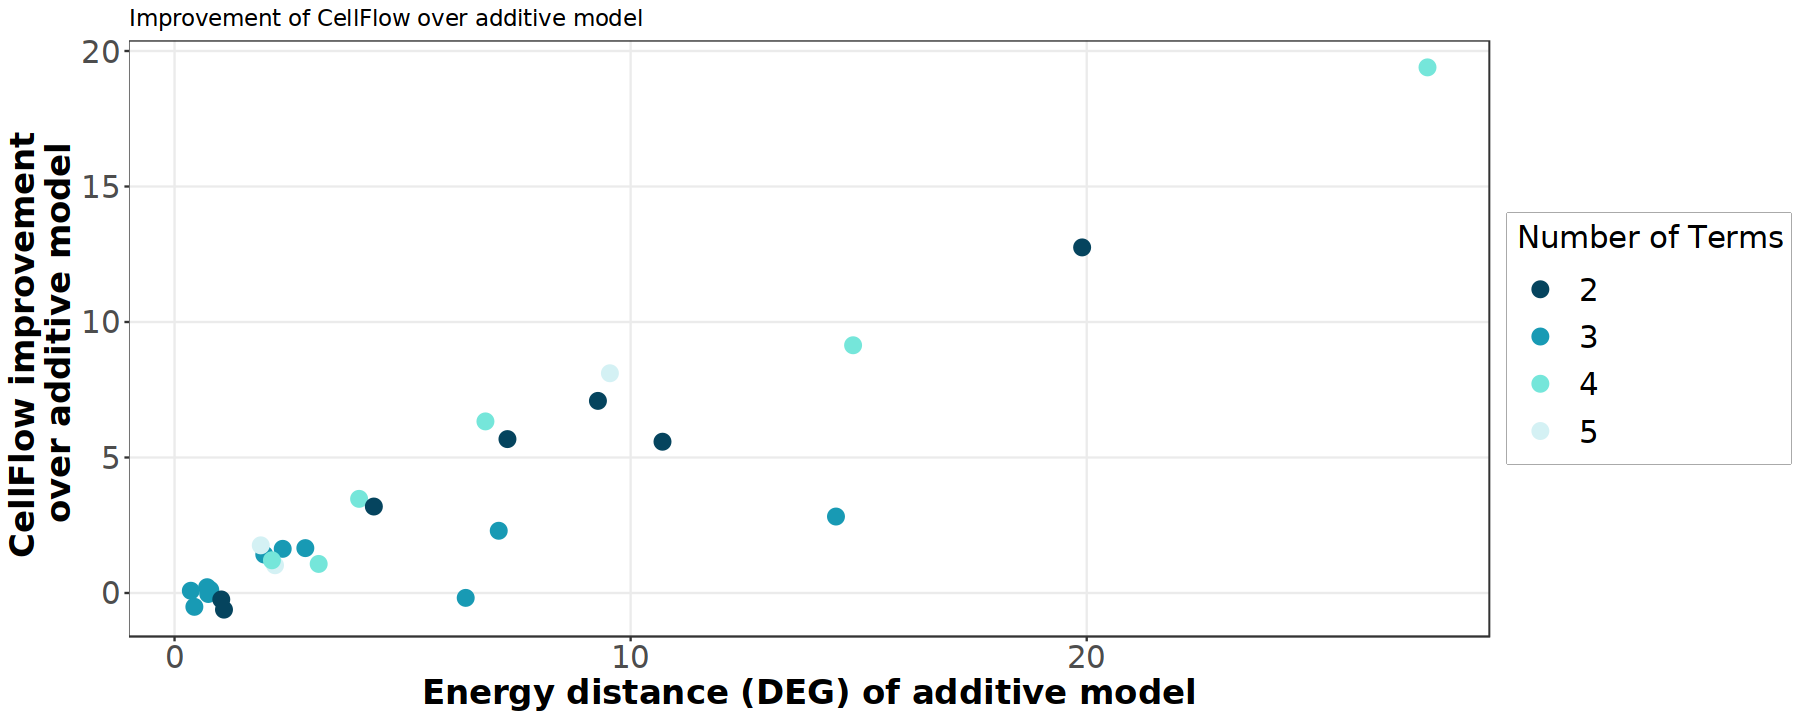

In [48]:
options(repr.plot.width = 15, repr.plot.height = 6)

# Convert number_terms to a factor if it's not already
results_add$number_terms <- as.factor(results_add$number_terms)

# Define colors for each level of number_terms
colors <- c("2" = "#05445e", "3" = "#189ab4", "4" = "#75e6da", "5" = "#d4f1f4")
ggplot(results_add, aes(x = value, y = diff, color = number_terms)) +
  geom_point(size = 4) +  # Increase the size of the points here
  labs(title = "Improvement of CellFlow over additive model", 
       x = "Energy distance (DEG) of additive model", 
       y = "CellFlow improvement \n over additive model",
       color = "Number of Terms ") +  # Legend title
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 20, face = "bold"),
    axis.title.y = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 18),  # Display x-axis labels
    axis.text.y = element_text(size = 18),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 18),
    legend.position = "right",  # Place legend to the right
    legend.direction = "vertical",
    legend.box.background = element_rect(color = "black"),
      legend.key.size = unit(1., 'cm'),
    panel.grid.minor = element_blank()
  ) +
  scale_color_manual(values = colors)  # Manually set the colors for each level
